# Data analysis
## Developed by *Kaustubh Joshi*

The data consist of the number of people present at different times in gym and also includes additional factor. Using this dataset interesting insights into attendace of the gym shall be derived. Also a predictive model shall ve developed which will, predict the number of people attending the gym given the values of other factors.
_____________________________________________________________________________________________


## Basic to do list -  These questions are necesssary to get one started on right path

Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?
    1. How attendace is affected by time of the week
    2. How attendace is affected by time of the temperature
    3. How attendace is affected by the start of the semester
    4. Create a model predicting the number of people attending the gym
    
Did you define the metric for success before beginning?
    1. Logical reasoning shall match
    2. Logical reasoning shall match
    3. Logical reasoning shall match
    4. 90% accuracy
    
Did you understand the context for the question and the scientific or business application?
    
    This data from university gym. This data consists of information about attendace of the gym and other factors taken at the same timestamp. using this data pedictive model can be developed which will predict the attendace of the gym which might be useful for the gym owner.
    
Did you record the experimental design?
    
    Dataset is available
    
Did you consider whether the question could be answered with the available data?
    
    Dataset consists of the 26066 records. So question shall be answered failry well

## Lets start analysis

The dataset is a .csv file which will be read using panda library. Below section will check basic data validity

In [21]:
import pandas as pd

Gym_data = pd.read_csv('D:\LocalHome\joshik\Downloads\Gym_data.csv')
Gym_data.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


Below section will give data disctribution overview

In [5]:
Gym_data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
count,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,41.055743,49427.729801,3.016458,0.291759,0.011509,59.013831,59.160459,0.100169
std,24.768592,22472.238011,2.005325,0.454581,0.106664,6.951850,6.661657,0.300231
min,0.000000,9.000000,0.000000,0.000000,0.000000,32.320000,38.140000,0.000000
25%,24.000000,31818.000000,1.000000,0.000000,0.000000,54.550000,54.550000,0.000000
50%,43.000000,49824.500000,3.000000,0.000000,0.000000,58.800000,58.800000,0.000000
75%,58.000000,68413.000000,5.000000,1.000000,0.000000,63.530000,63.530000,0.000000
max,138.000000,86120.000000,6.000000,1.000000,1.000000,87.170000,87.170000,1.000000


The dataset seems very clean because
1. Number of rows for all the data columns are same
2. Maximum number of people = 138 and min = 0 , looks reasonable
3. Maximum timestampvalue = 86120 which equal around 23 hours is reasonable
4. max day of the week = 6  and min = 0 , seems reasonable
5. apperant temperature and actual temperature ranges are logical


Below we plot pair plot , to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

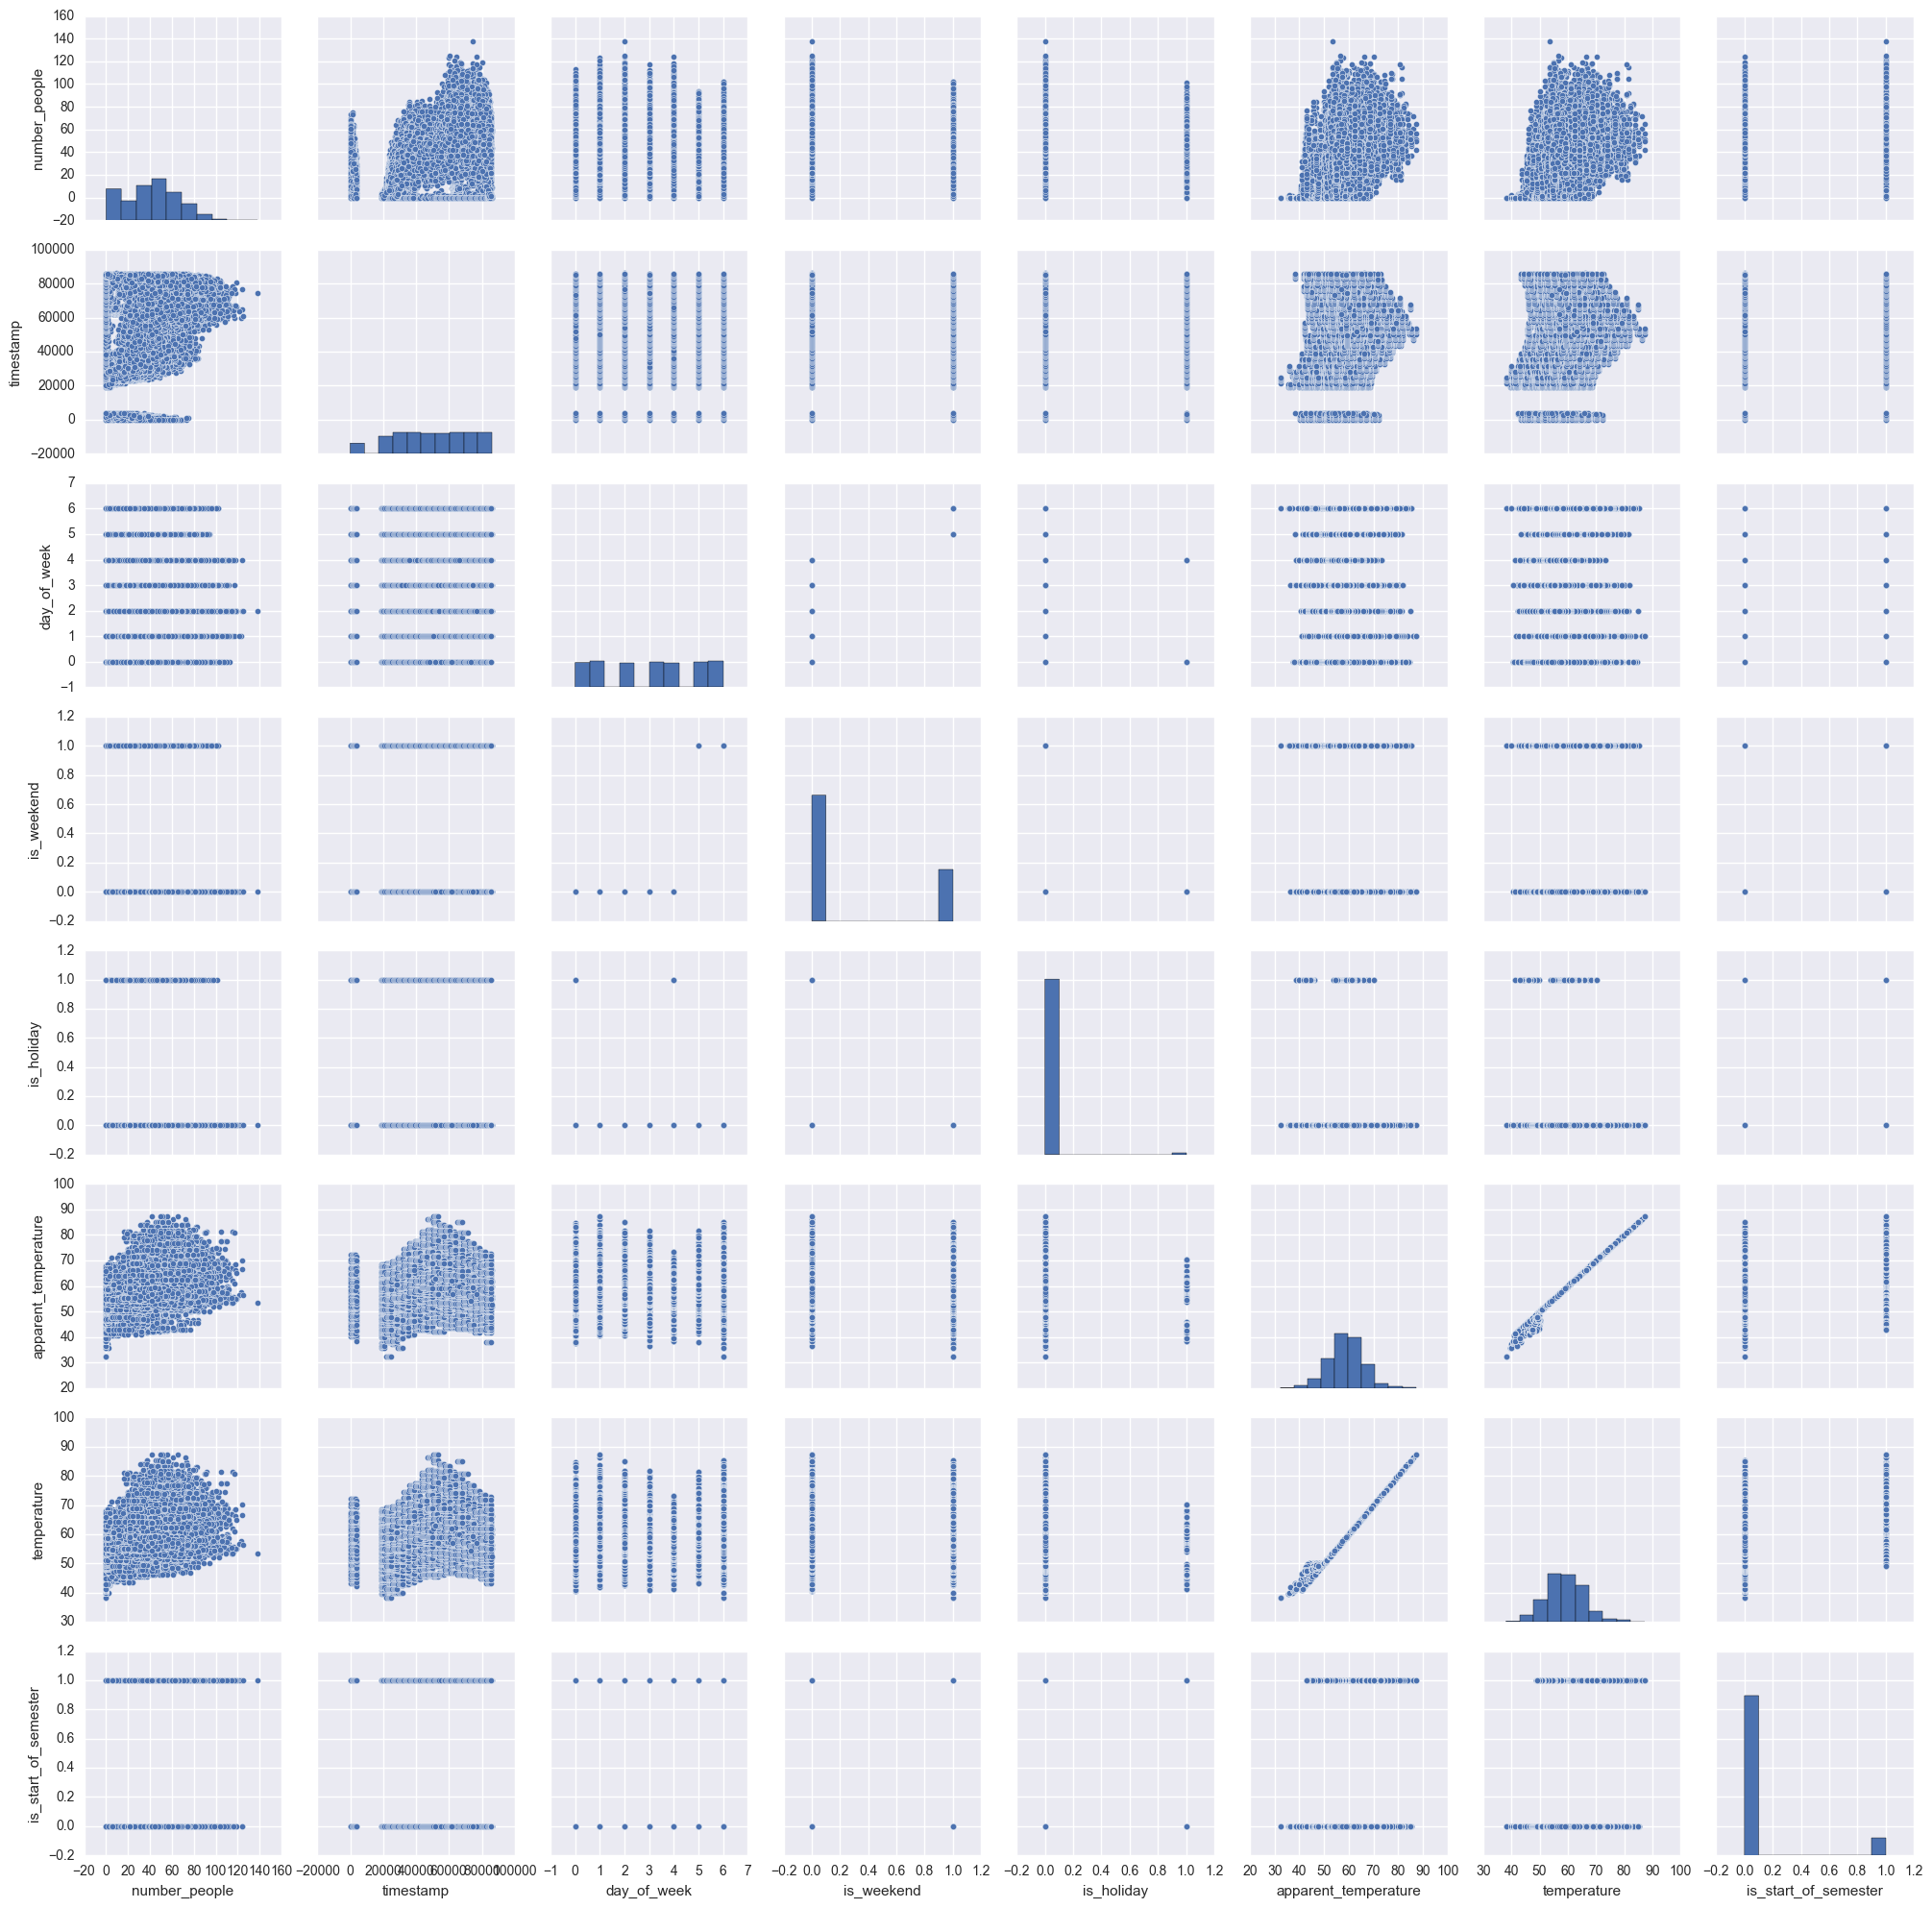

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(Gym_data)

From above pairplot few things can be found
1. number of people attending gym and temperatures are showing gaussian distribution which is good thing
2. There is some kind of relationship exiting between temperatures and number of people attending gym
3. There is strong correleation between apperent temperature and temperature (offcourse !!), so which developing predictive model, one of them has to go out.

Let's get insights into the how data is correlated 

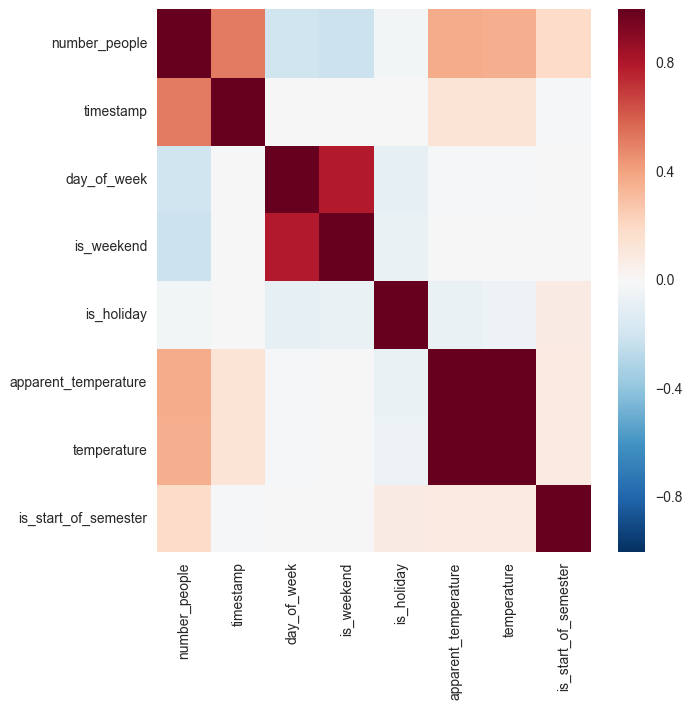

In [9]:
corrmat = Gym_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()

## There is positive correlation between number of people and timestamp. Does it mean more number of people are coming at higher timestamp? Lets find out

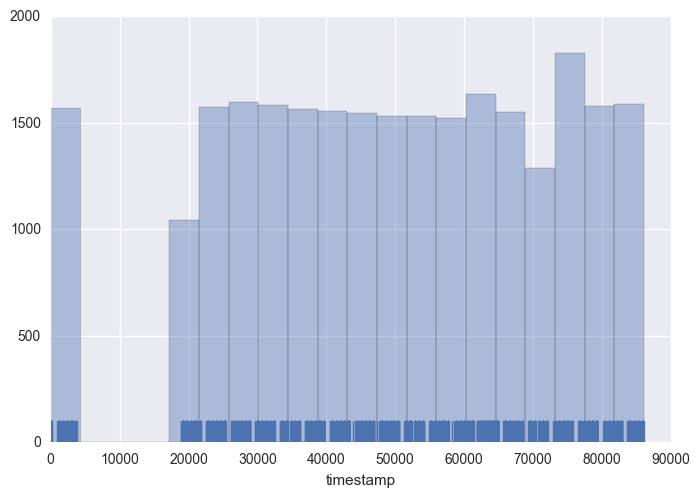

In [22]:
sb.distplot(Gym_data['timestamp'], bins=20, kde=False, rug=True)

 ### Ahaaaa !! so statement "more number of people are coming at higher timestamp" is not true from above graph, the correlation exists because there no people going to gym between 1.00 to 5.00 o'clock

From pairplot there is negative correlation between day_of_week and number of people going to gym. Does it mean that more number of people go to gym on day = 0 i.e monday than and less on sunday?? Let's find out

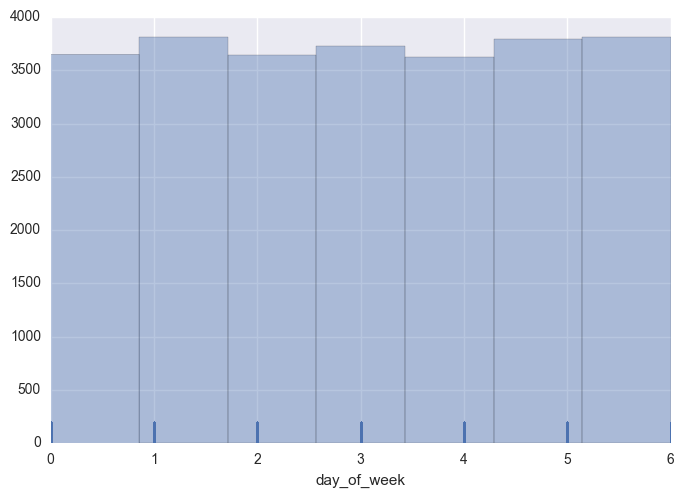

In [24]:
sb.distplot(Gym_data['day_of_week'], bins=7, kde=False, rug=True)

No that's not the case